In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install pymc
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.othermod.betareg import BetaModel

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
marzo = pd.read_csv('C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\marzo.csv')
#abril = pd.read_csv('abril.csv')
#mayo = pd.read_csv('mayo.csv')
#df = pd.concat([marzo,abril,mayo], axis = 0)
df = marzo

In [26]:
df.head()

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada
0,61.980.620-4,937232-133-COT23,SE REQUIEREN REPONER CUBETAS,OC Emitida,CLP,1800000.0,Cubetas de impresión dental,42152105,Equipamiento y suministros médicos / Equipos y...,Cubetas de impresión dental,Equipamiento y suministros médicos / Equipos y...,DESPACHO 1 DÍA RECIBIDA OC.\nMONTO MÍNIMO EN F...,73960.0,77.371.920-9,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,True
1,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,MEDICALTEK CHILE S.A,10680.0,96.696.000-0,"VENTA AL POR MAYOR DE ARTICULOS DE PERFUMERIA,...",True
2,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,JV-MYD EL PROVEEDOR OFRECE LOS PRODUCTOS DETAL...,10680.0,76.271.360-8,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False
3,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,SE OFERTA LO SOLICITADO CON FOTOS CORRESPONDIE...,10000.0,76.687.656-0,"Comercial, dental.",False
4,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,SE COTIZA LO REQUERIDO - PRODUCTOS CON DISPONI...,18920.0,76.393.260-5,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False


In [27]:
df.describe()

,agilebuyingsavailableamount,agileitemsmp_id,agileoffereditemspreciototal
count,4.938690e+05,4.938690e+05,4.938690e+05
mean,9.875966e+05,4.650909e+07,2.369252e+05
std,6.197130e+05,4.081744e+06,3.398559e+05
min,1.000000e+00,4.212150e+07,0.000000e+00
25%,4.220000e+05,4.321160e+07,2.400000e+04
50%,9.000000e+05,4.412210e+07,8.970000e+04
75%,1.680000e+06,5.013170e+07,2.940000e+05
max,1.873500e+06,5.612200e+07,1.800000e+06


<Axes: >

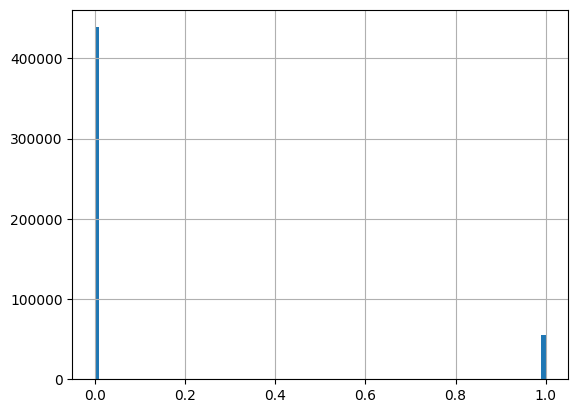

In [28]:
df['numeric'] = df['adjudicada'].apply(lambda x: 1 if x == True else 0)
df['numeric'].hist(bins = 100)

numeric         total adj_rate
adjudicada          False  True                 
taxnumberprovider                               
10.000.558-1          0.0  13.0    13.0     1.00
10.011.441-0         20.0   1.0    21.0     0.05
10.018.801-5         17.0   1.0    18.0     0.06
10.024.618-k         22.0   0.0    22.0     0.00
10.025.673-8         80.0   0.0    80.0     0.00
...                   ...   ...     ...      ...
99.571.800-6         24.0  22.0    46.0     0.48
99.574.460-0        244.0  14.0   258.0     0.05
99.576.080-0         72.0  26.0    98.0     0.27
99.587.590-K         21.0   1.0    22.0     0.05
99.593.170-2       1132.0  88.0  1220.0     0.07

[2877 rows x 4 columns]

<Axes: title={'center': 'Distribución de rate de adjudicación. n> 10 participaciones'}, ylabel='Density'>

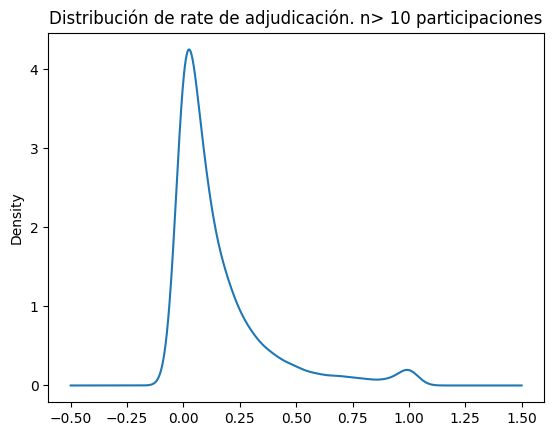

In [29]:
gb = df[['taxnumberprovider','adjudicada', 'numeric']].groupby(by=['taxnumberprovider','adjudicada']).count()
gb = gb.unstack().fillna(0)


gb['total'] = gb[('numeric', False)] +  gb[('numeric', True)]
gb['adj_rate'] =( gb[('numeric', True)]/gb['total']).round(2)
gb = gb[gb['total'] >= 10]
display(gb)

gb['adj_rate'].plot.density(title= 'Distribución de rate de adjudicación. n> 10 participaciones')

Text(0.5, 1.0, 'Distribución probabilidad de adjudicaciones por usuario, todos los rubros.')

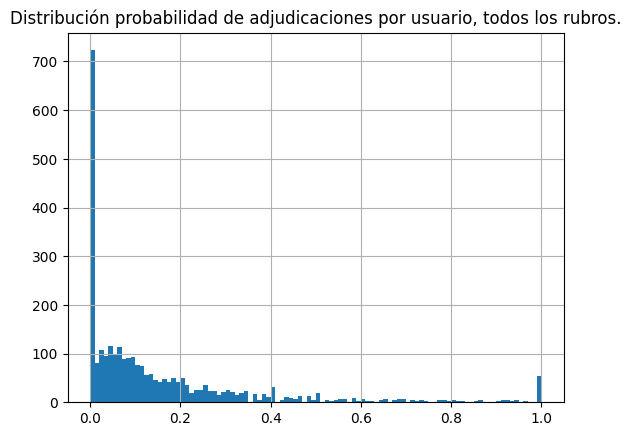

In [30]:
ax = gb['adj_rate'].hist(bins = 100)
plt.title('Distribución probabilidad de adjudicaciones por usuario, todos los rubros.')

In [31]:
gb = gb.reset_index()
gb

taxnumberprovider numeric         total adj_rate
adjudicada                     False  True                 
0               10.000.558-1     0.0  13.0    13.0     1.00
1               10.011.441-0    20.0   1.0    21.0     0.05
2               10.018.801-5    17.0   1.0    18.0     0.06
3               10.024.618-k    22.0   0.0    22.0     0.00
4               10.025.673-8    80.0   0.0    80.0     0.00
...                      ...     ...   ...     ...      ...
2872            99.571.800-6    24.0  22.0    46.0     0.48
2873            99.574.460-0   244.0  14.0   258.0     0.05
2874            99.576.080-0    72.0  26.0    98.0     0.27
2875            99.587.590-K    21.0   1.0    22.0     0.05
2876            99.593.170-2  1132.0  88.0  1220.0     0.07

[2877 rows x 5 columns]

In [32]:
gb_merge= gb[['taxnumberprovider','total','adj_rate']].reset_index()
 

In [33]:
gb_merge.columns
gb_merge = gb_merge.rename(columns={('total', ''):'total',
                             ('adj_rate', ''):'adj_rate'})
gb_merge = gb_merge.droplevel('adjudicada', axis = 1)


In [34]:
gb_merge.columns

Index(['index', 'taxnumberprovider', 'total', 'adj_rate'], dtype='object')

In [35]:
merge = pd.merge(df,gb_merge, on = 'taxnumberprovider', how = 'left')
#print(merge.columns)
  

In [36]:
merge.head()

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada,numeric,index,total,adj_rate
0,61.980.620-4,937232-133-COT23,SE REQUIEREN REPONER CUBETAS,OC Emitida,CLP,1800000.0,Cubetas de impresión dental,42152105,Equipamiento y suministros médicos / Equipos y...,Cubetas de impresión dental,Equipamiento y suministros médicos / Equipos y...,DESPACHO 1 DÍA RECIBIDA OC.\nMONTO MÍNIMO EN F...,73960.0,77.371.920-9,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,True,1,1948.0,341.0,0.25
1,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,MEDICALTEK CHILE S.A,10680.0,96.696.000-0,"VENTA AL POR MAYOR DE ARTICULOS DE PERFUMERIA,...",True,1,2820.0,1459.0,0.08
2,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,JV-MYD EL PROVEEDOR OFRECE LOS PRODUCTOS DETAL...,10680.0,76.271.360-8,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False,0,668.0,1080.0,0.41
3,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,SE OFERTA LO SOLICITADO CON FOTOS CORRESPONDIE...,10000.0,76.687.656-0,"Comercial, dental.",False,0,1083.0,2323.0,0.11
4,70.885.500-6,1208069-35-COT23,INSUMOS DENTALES ESPECIALIDAD ENDODONCIA,OC Emitida,CLP,1156000.0,Cuñas o sets odontológicos,42151663,Equipamiento y suministros médicos / Equipos y...,Cuñas o sets odontológicos,Equipamiento y suministros médicos / Equipos y...,SE COTIZA LO REQUERIDO - PRODUCTOS CON DISPONI...,18920.0,76.393.260-5,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False,0,792.0,576.0,0.04


In [37]:
from statsmodels.othermod.betareg import BetaModel

In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming merge is your DataFrame
columns_train = ['total', 'adj_rate']
endog = merge['numeric'].fillna(0)
exog = merge[columns_train].fillna(0)
exog = sm.add_constant(exog)

# Check for missing values
print("Missing values in endog:", endog.isnull().sum())
print("Missing values in exog:", exog.isnull().sum())

# Check data types
endog = endog.astype(float)
exog = exog.astype(float)

# Check values in endog
print("Values outside [0, 1] range in endog:", endog[(endog < 0) | (endog > 1)])

# Fit logistic regression model
#mod = sm.Logit(endog, exog)
mod = sm.OLS(endog, exog)
rslt = mod.fit()
print(rslt.summary())


Missing values in endog: 0
Missing values in exog: const       0
total       0
adj_rate    0
dtype: int64
Values outside [0, 1] range in endog: Series([], Name: numeric, dtype: float64)
                            OLS Regression Results                            
Dep. Variable:                numeric   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                 3.774e+04
Date:                Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:16:33   Log-Likelihood:                -94847.
No. Observations:              493869   AIC:                         1.897e+05
Df Residuals:                  493866   BIC:                         1.897e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef   

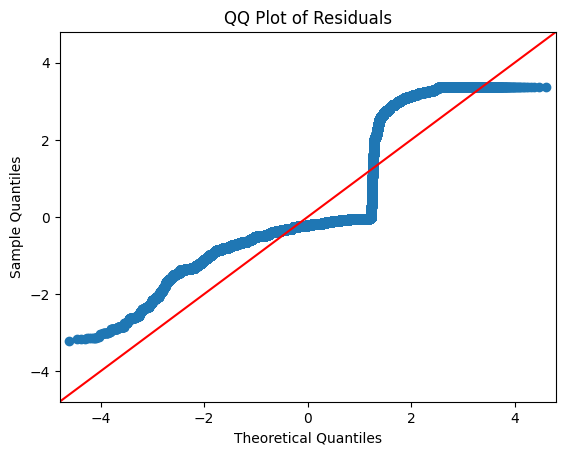

In [41]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Get standardized residuals
standardized_residuals = rslt.get_influence().resid_studentized_internal

# Plot QQ plot
sm.qqplot(standardized_residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()


NameError: name 'fitted_values' is not defined

In [39]:
import numpy as np
import pandas as pd 

 

# Fit beta regression model
model = betareg.beta_reg('numeric ~ adj_rate + total', data=merge)

# Print model summary
print(model.summary())



NameError: name 'betareg' is not defined